In [20]:
alpha = brk.API(environment="practice" , access_token=access_token)
snp500 = alpha.get_history(instrument="SPX500_USD",
                                      granularity='H1',
                                      count = 5000,)

In [22]:
test = pd.DataFrame(snp500['candles'])

In [23]:
test['mid'] = (test['closeBid']+test['closeAsk'])/2

In [24]:
test['spread'] = abs((test['closeBid']-test['closeAsk']))

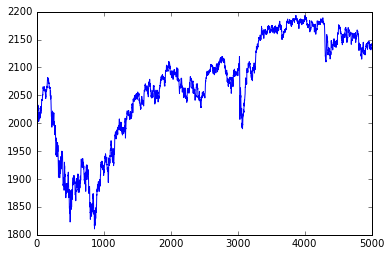

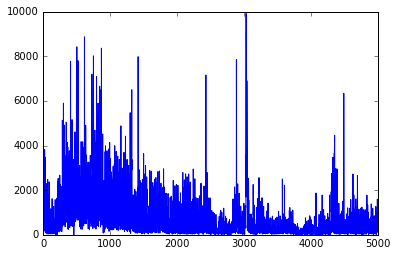

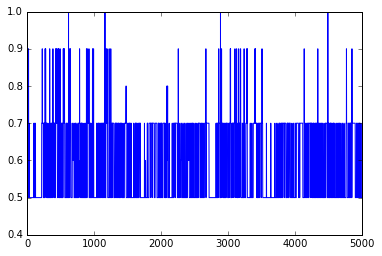

In [26]:
%matplotlib inline
test['mid'].plot() #Events
import matplotlib.pyplot as plt
plt.figure(2)
test['volume'].plot()
plt.figure(3)
test['spread'].plot()

In [28]:
tn = test['mid'][-1:][4999]

In [29]:
mu_price = test['mid'].mean()
sigma_price = test['mid'].std()

In [30]:
mu_price,sigma_price

(2067.3303000000005, 94.0604315154112)

In [31]:
dxt_log = test['mid'].apply(np.log).diff(1).dropna()

In [32]:
dxt = test['mid'].diff(1).dropna()

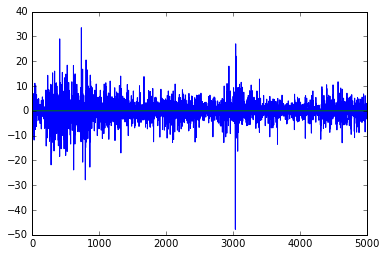

In [33]:
dxt.plot()
dxt_log.plot()

In [34]:
d2xt = dxt.diff(1).dropna()

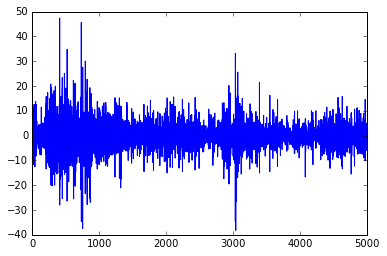

In [35]:
d2xt.plot()

In [36]:
from numpy import *
mu = dxt.mean()
mu_log = dxt_log.mean()

In [37]:
r = dxt.skew() #3rd moment normal = 0
r_log = dxt_log.skew()

In [38]:
r,r_log

(-0.40295183382508892, -0.35529251133191342)

In [39]:
theta = dxt.kurt() #4th moment > || < 0.5
                            # high strong bull/bear trend
                            #normal = 3  
theta_log = dxt_log.kurt()

In [40]:
theta,theta_log

(12.560512313864749, 13.080575993657488)

In [41]:
sigma = dxt.std()
sigma_log = dxt_log.std()

In [42]:
exp(mu),mu_log,sigma,sigma_log,r,theta # from log returns

(1.0173319212077261,
 8.186459691780241e-06,
 3.711752097057383,
 0.0018656229353666443,
 -0.40295183382508892,
 12.560512313864749)

In [43]:
mu_price,sigma_price

(2067.3303000000005, 94.0604315154112)

In [44]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(dxt,axis=0),help(jarque_bera)

Help on function jarque_bera in module statsmodels.stats.stattools:

jarque_bera(resids, axis=0)
    Calculate residual skewness, kurtosis, and do the JB test for normality
    
    Parameters
    -----------
    resids : array-like
    axis : int, optional
        Default is 0
    
    Returns
    -------
    JB, JBpv, skew, kurtosis
    
    JB = n/6*(S^2 + (K-3)^2/4)
    
    JBpv is the Chi^2 two-tail probability value
    
    skew is the measure of skewness
    
    kurtosis is the measure of kurtosis



((32924.68394927868, 0.0, -0.40283091401375704, 15.546752806793965), None)

# Simulation of AR(1) process with small jumps

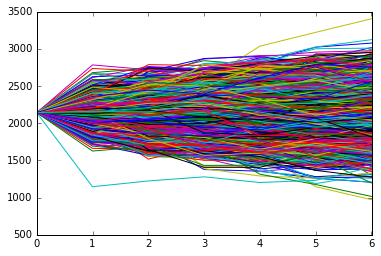

In [46]:
import matplotlib.pyplot as plt
def ar(n): 
    X=np.zeros(n) 
    for i in range(n-1):
        X[i+1] = X[i] + random.normal(mu,sigma**2) + random.poisson(lam=lam_param , size=1)[0]*random.normal(mu,sigma**2)  #sample space
    return X

for i in range(10000):
    X = ar(7) + tn 
    plt.plot(X)
plt.show()

# Generate 10,000 samples 

In [47]:
f = [(ar(7) + tn) for i in range(10000)]

In [48]:
tn - test['mid'].mean() 

74.919699999999466

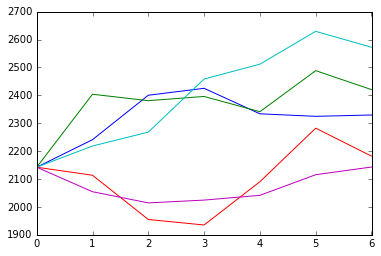

In [49]:
plt.plot(f[0])
plt.figure(1)
plt.plot(f[1])
plt.plot(f[2])
plt.plot(f[3])
plt.plot(f[4])
plt.show() # simulation for spread , volume and price 

#  Estimate

In [50]:
okay = pd.DataFrame(f).apply(lambda x_t: sum(x_t)/len(x_t))

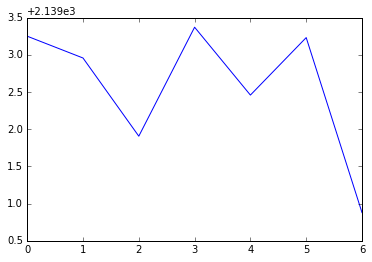

In [51]:
okay.plot() # maximize profits , reduce drawdowns through hedge strat.

In [52]:
okay  #prediction is odd

0    2142.250000
1    2141.956976
2    2140.906152
3    2142.370743
4    2141.458632
5    2142.231229
6    2139.879191
dtype: float64

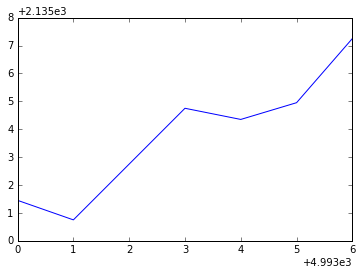

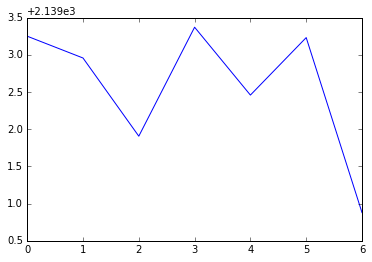

In [53]:
plt.figure(1)
test['mid'][-7:].plot()
plt.figure(2)
okay.plot()

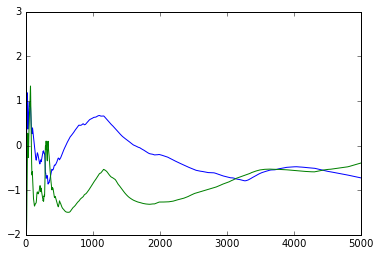

In [54]:
# When simulating AutoReg process for S&P 500 
# consider extending model to include the 3rd and 4th moment E(x_t) hmm..
test['mid'].expanding(min_periods=2).skew().dropna().plot()#blue
test['mid'].expanding(min_periods=2).kurt().dropna().plot()#green

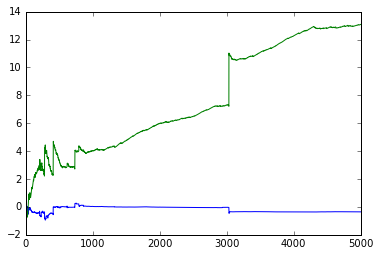

In [55]:
#  3rd 4th moment of change in price 
#4th moment > || < 0.5
# high strong bull/bear trend
#normal = 3  
dxt_log.expanding(min_periods=2).skew().dropna().plot() #blue
dxt_log.expanding(min_periods=2).kurt().dropna().plot() #green

In [59]:
help(np.random.dirichlet)

Help on built-in function dirichlet:

dirichlet(...) method of mtrand.RandomState instance
    dirichlet(alpha, size=None)
    
    Draw samples from the Dirichlet distribution.
    
    Draw `size` samples of dimension k from a Dirichlet distribution. A
    Dirichlet-distributed random variable can be seen as a multivariate
    generalization of a Beta distribution. Dirichlet pdf is the conjugate
    prior of a multinomial in Bayesian inference.
    
    Parameters
    ----------
    alpha : array
        Parameter of the distribution (k dimension for sample of
        dimension k).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    samples : ndarray,
        The drawn samples, of shape (size, alpha.ndim).
    
    Notes
    -----
    .. math:: X \approx \prod_{i=1}^{k}{x^{\alpha_i-1